In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.tools.tools as sm
import matplotlib.pyplot as plt

#### Linear Regression with one feature

In [430]:
import pandas as pd
songs_data_train = pd.read_json("playlists_data_with_audio_features.json")

In [329]:
# songs_data_train.groupby("genre")["acous_mean"].count()

C:\Users\Haixing\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


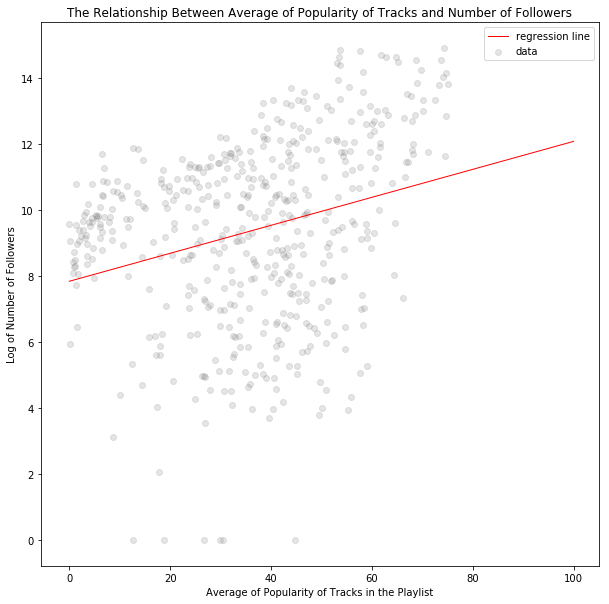

In [110]:
from numpy import inf
y = songs_data_train['followers']
y_log = np.log(y)
y_log[y_log == -inf] = 0
X = songs_data_train['pop_mean']

X_const = sm.add_constant(X)

regression = LinearRegression(fit_intercept=True)
regression.fit(X_const, y_log)

regression_line = lambda x: regression.coef_[1] * x +regression.intercept_

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

x_vals = np.linspace(0,100,100)
ax.plot(x_vals, regression_line(x_vals), color='red', linewidth=1.0, label='regression line')
ax.scatter(X, y_log, color='gray', alpha=0.2, label='data')

ax.set_xlabel('Average of Popularity of Tracks in the Playlist')
ax.set_ylabel('Log of Number of Followers')
ax.set_title('The Relationship Between Average of Popularity of Tracks and Number of Followers')
ax.legend(loc='best')
plt.show()

In [137]:
from sklearn.model_selection import train_test_split,cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X_const, y_log, test_size=0.33, random_state=6)

regression = LinearRegression(fit_intercept=True)
regression.fit(X_const, y_log)

train_MSE= np.mean((y_train - regression.predict(X_train))**2)
test_MSE= np.mean((y_test - regression.predict(X_test))**2)
print('The train MSE is {}, the test MSE is {}'.format(train_MSE, test_MSE))

score = cross_val_score(estimator = regression, X = X_const, y = y_log , cv=5)
score

The train MSE is 6.568746558606924, the test MSE is 8.345354130777794


array([-0.02413031,  0.07645935, -1.8374293 ,  0.15915949,  0.13152704])

#### Linear Regression with all features

In [331]:
songs_data_train.loc[songs_data_train["genre"].str.contains('pop'),"genre_narrow"] = "pop"
songs_data_train.loc[songs_data_train["genre"].str.contains('metal'),"genre_narrow"] = "metal"
songs_data_train.loc[songs_data_train["genre"].str.contains('jazz'),"genre_narrow"] = "jazz"
songs_data_train.loc[songs_data_train["genre"].str.contains('rock'),"genre_narrow"] = "rock"
songs_data_train.loc[songs_data_train["genre"].str.contains('punk'),"genre_narrow"] = "punk"
songs_data_train.loc[songs_data_train["genre"].str.contains('hop'),"genre_narrow"] = "hiphop"
songs_data_train.loc[songs_data_train["genre"].str.contains('modern'),"genre_narrow"] = "modern"
songs_data_train.loc[songs_data_train["genre"].str.contains('classical'),"genre_narrow"] = "classical"
songs_data_train.loc[songs_data_train["genre"].str.contains('soul'),"genre_narrow"] = "soul"
songs_data_train.loc[songs_data_train["genre"].str.contains('blues'),"genre_narrow"] = "blues"
songs_data_train.loc[songs_data_train["genre"].str.contains('hardcore'),"genre_narrow"] = "hardcore"
songs_data_train.loc[songs_data_train["genre"].str.contains('children'),"genre_narrow"] = "children"
songs_data_train.loc[songs_data_train["genre"].str.contains('dance'),"genre_narrow"] = "dance"
songs_data_train.loc[songs_data_train["genre"].str.contains('rap'),"genre_narrow"] = "rap"
songs_data_train.loc[songs_data_train["genre"].str.contains('drama'),"genre_narrow"] = "drama"
songs_data_train.loc[songs_data_train["genre"].str.contains('funk'),"genre_narrow"] = "funk"
songs_data_train.loc[songs_data_train["genre"].str.contains('electronic'),"genre_narrow"] = "electronic"
songs_data_train.loc[songs_data_train["genre_narrow"]==None,"genre_narrow"] = "other"

In [341]:
songs_data_train = songs_data_train.drop("genre",axis=1)
genre=pd.get_dummies(songs_data_train['genre_narrow'],prefix='genre')
df_with_dummies = pd.get_dummies(songs_data_train, columns = ["genre_narrow"])

In [361]:
y = df_with_dummies['followers']
y_log = np.log(y)
y_log[y_log == -inf] = 0
X = df_with_dummies.drop('followers', axis=1)

X_const = sm.add_constant(X)

regression = LinearRegression(fit_intercept=True)
regression.fit(X_const, y_log)

C:\Users\Haixing\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X_const, y_log, test_size=0.33, random_state=6)

regression = LinearRegression(fit_intercept=True)
regression.fit(X_const, y_log)

train_MSE= np.mean((y_train - regression.predict(X_train))**2)
test_MSE= np.mean((y_test - regression.predict(X_test))**2)
print('The train MSE is {}, the test MSE is {}'.format(train_MSE, test_MSE))

score = cross_val_score(estimator = regression, X = X_const, y = y_log , cv=5)
score

The train MSE is 5.8178603398653745, the test MSE is 7.253431470104157


array([ 0.2706326 , -1.25496486,  0.02026471])

In [423]:
y_log10 = np.log10(y)
y_log10[y_log10==-inf]=0
y_log10.describe()

C:\Users\Haixing\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


count    497.000000
mean       4.072322
std        1.211758
min        0.000000
25%        3.339451
50%        4.184123
75%        4.938049
max        6.478359
Name: followers, dtype: float64

#### Polynomial Regression

In [ ]:
y_train = songs_data_train['followers']
X_train = songs_data_train['','','','']

gen_poly_terms = PolynomialFeatures(degree=2, interaction_only=False)

X_train_with_poly = gen_poly_terms.fit_transform(X_train)
X_test_with_poly = gen_poly_terms.fit_transform(X_test)

poly_regression_model = LinearRegression(fit_intercept=True)
poly_regression_model.fit(X_train_with_poly, y_train)

train_MSE= np.mean((y_train - poly_regression_model.predict(X_train_with_poly))**2)
test_MSE= np.mean((y_test - poly_regression_model.predict(X_test_with_poly))**2)
print('The train MSE for degree 2 poly model is {}, the test MSE is {}'.format(train_MSE, test_MSE))

train_R_sq = poly_regression_model.score(X_train_with_poly, y_train)
test_R_sq = poly_regression_model.score(X_test_with_poly, y_test)
print('The train R^2 for degree 2 poly model is {}, the test R^2 is {}'.format(train_R_sq, test_R_sq))

In [ ]:
train_R_sq = []
test_R_sq = []
max_deg = 10

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

for d in range(max_deg + 1):

    out = d * 1. / max_deg * 100
    sys.stdout.write("\r%d%%" % out)
    sys.stdout.flush()

    gen_poly_terms = PolynomialFeatures(degree=d, interaction_only=False)
    X_train_with_poly = gen_poly_terms.fit_transform(X_train)
    X_test_with_poly = gen_poly_terms.fit_transform(X_test)
    
    poly_regression_model = LinearRegression(fit_intercept=False)
    poly_regression_model.fit(X_train_with_poly, y_train)
    
    train_R_sq.append(poly_regression_model.score(X_train_with_poly, y_train))
    test_R_sq.append(poly_regression_model.score(X_test_with_poly, y_test))
    
sys.stdout.write("\r%d%%" % 100)

In [425]:
import json
with open('1500-onwards.json','r') as js:
    pl_1500 =json.load(js)

In [427]:
playlists_data = []
for pl in pl_1500:
    try:
        playlist_data = {}

        # followers
        # tracks_num
        playlist_data["followers"] = pl["list"]["followers"]["total"]
        playlist_data["tracks_num"] = pl["list"]["tracks"]["total"]

        # market 
        # popularity
        markets = []
        gen = []
        pop = []
        acous = []
        dance = []
        energy = []
        instru = []
        live = []
        loud = []
        valence = []
        for j in range(playlist_data["tracks_num"]):


            market = pl["tracks"][j]["available_markets"]
            markets = list(set().union(markets,market))
            gen.extend(pl["tracks"][j]["artists"]["items"][0]["genres"])

            pop.append(pl["tracks"][j]['popularity'])
            acous.append(pl["tracks"][j]['acousticness'])
            dance.append(pl["tracks"][j]['danceability'])
            energy.append(pl["tracks"][j]['energy'])
            instru.append(pl["tracks"][j]['instrumentalness'])
            live.append(pl["tracks"][j]['liveness'])
            loud.append(pl["tracks"][j]['loudness'])
            valence.append(pl["tracks"][j]['valence'])

        playlist_data["avaiable_market"] = len(markets)

        c = Counter(gen)
        playlist_data["genre"] = c.most_common()[0][0]


        if pop != []:
            playlist_data["pop_mean"] = np.mean(pop)
            playlist_data["pop_std"] = np.std(pop)
        else:
            playlist_data["pop_mean"] = np.nan
            playlist_data["pop_std"] = np.nan

        if acous != []:
            playlist_data["acous_mean"] = np.mean(acous)
            playlist_data["acous_std"] = np.std(acous)
        else:
            playlist_data["acous_mean"] = np.nan
            playlist_data["acous_std"] = np.nan     

        if dance != []:
            playlist_data["dance_mean"] = np.mean(dance)
            playlist_data["dance_std"] = np.std(dance)
        else:
            playlist_data["dance_mean"] = np.nan
            playlist_data["dance_std"] = np.nan

        if energy != []:
            playlist_data["energy_mean"] = np.mean(energy)
            playlist_data["energy_std"] = np.std(energy)
        else:
            playlist_data["energy_mean"] = np.nan
            playlist_data["energy_std"] = np.nan

        if instru != []:
            playlist_data["instru_mean"] = np.mean(instru)
            playlist_data["instru_std"] = np.std(instru)
        else:
            playlist_data["instru_mean"] = np.nan
            playlist_data["instru_std"] = np.nan

        if live != []:
            playlist_data["live_mean"] = np.mean(live)
            playlist_data["live_std"] = np.std(live)
        else:
            playlist_data["live_mean"] = np.nan
            playlist_data["live_std"] = np.nan

        if loud != []:
            playlist_data["loud_mean"] = np.mean(loud)
            playlist_data["loud_std"] = np.std(loud)
        else:
            playlist_data["loud_mean"] = np.nan
            playlist_data["loud_std"] = np.nan

        if valence != []:
            playlist_data["valence_mean"] = np.mean(valence)
            playlist_data["valence_std"] = np.std(valence)
        else:
            playlist_data["valence_mean"] = np.nan
            playlist_data["valence_std"] = np.nan

        playlists_data.append(playlist_data)
    except:
        continue

In [442]:
data_700_1600.to_json("data_700_1600.json")
# data_700_1600 = songs_data_train.append(dataframe,ignore_index=True)